<a href="https://colab.research.google.com/github/Divs2930/Titanic-Survival-Prediction-Machine-Learning-Model/blob/main/Titanic_Survival_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd           # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                    #Data Visualization function
import seaborn as sns                              #Data Visualization function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Data Collection & Processing

In [ ]:
#load the data from csv file to panda dataframe
titanic_data=pd.read_csv('/content/drive/MyDrive/ML Projects /Titanic Survival Prediction /DataSet/tested.csv')

In [ ]:
#printing the first five rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#number of rows and cols
titanic_data.shape

(418, 12)

In [ ]:
# getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# Check no of missing values in each col
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

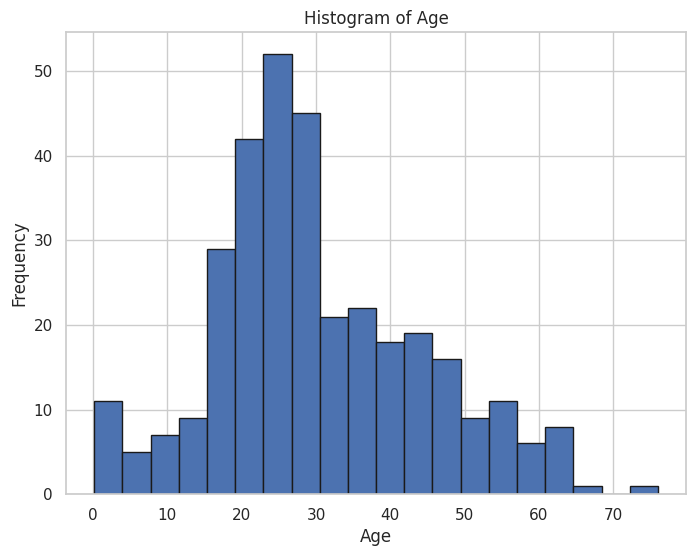

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64


In [ ]:
age_data = titanic_data['Age']

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Summary Statistics
summary_stats = age_data.describe()
print(summary_stats)

**Calculating Interquartile Range (IQR)**--

Q1 = 21 (25th percentile)

Q3 = 39 (75th percentile)


**IQR** = Q3 - Q1 = 39 - 21 = 18

**Lower Limit:** Q1 - 1.5 * IQR = 21 - 1.5 * 18 = 21 - 27 = -6

**Upper Limit:** Q3 + 1.5 * IQR = 39 + 1.5 * 18 = 39 + 27 = 66

**any value below -6 or above 66 could be considered a potential outlier.**

**If there are no outliers and the distribution is normal: Use the mean.**

**If there are outliers or the distribution is skewed: Use the median.**

Since the maximum age value (76) is within the potential outlier range that we've defined (-6 to 66), we don't have any values that are currently identified as outliers based on this method. Therefore, if the distribution of ages is not heavily skewed and you don't have extreme outliers, using the mean to fill in missing values could be a reasonable approach for your "Age" column.

Since the maximum age value (76) is within the potential outlier range that you've defined (-6 to 66), you don't have any values that are currently identified as outliers based on this method. Therefore, if the distribution of ages is not heavily skewed and you don't have extreme outliers, using the mean to fill in missing values could be a reasonable approach for your "Age" column.





Handling the Missing values

In [ ]:
# drop the cabin column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [ ]:
#replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True) # if we remove inplace=True it will replace all missing value for this particular cell we want to update whole data frameso we add inplace
#replacing the missing values in "Fare" column with meadian value
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

In [ ]:
# Check no of missing values in each col
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [ ]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# finding no of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**Data Visualization**

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

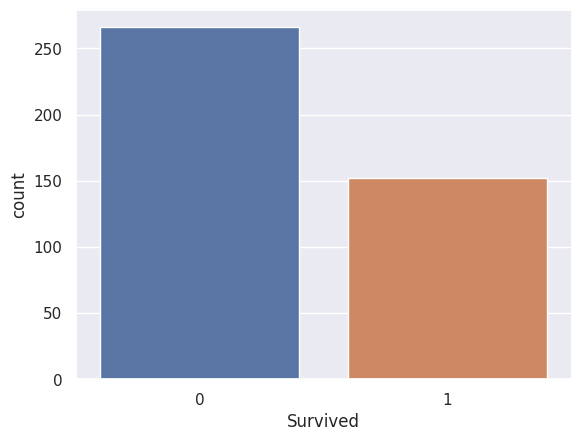

In [ ]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

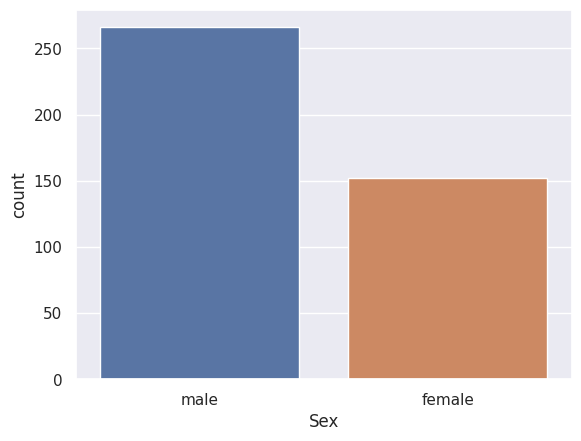

In [ ]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

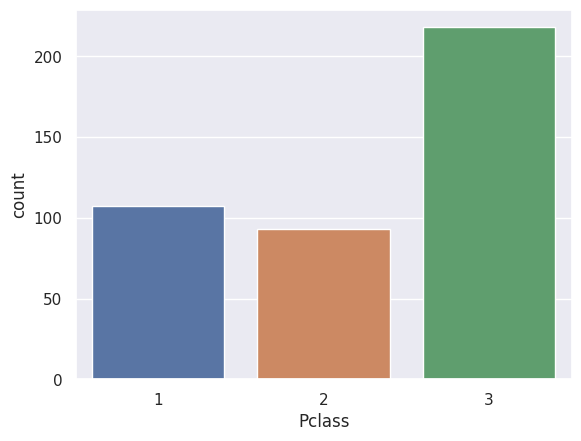

In [ ]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

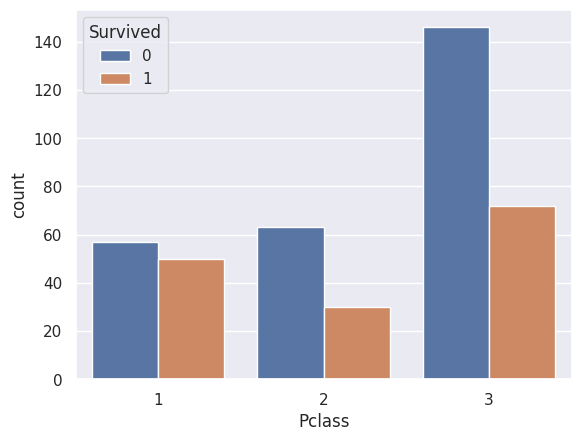

In [ ]:
# no of survivors Pclass wise
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [ ]:
titanic_data['Age'].value_counts()

30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: Age, Length: 80, dtype: int64

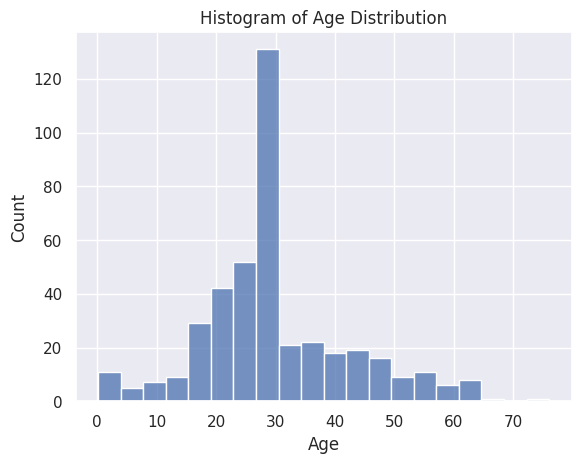

In [ ]:
sns.histplot(data=titanic_data, x='Age', bins=20)  # Adjust 'bins' as needed
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age Distribution')
plt.show()

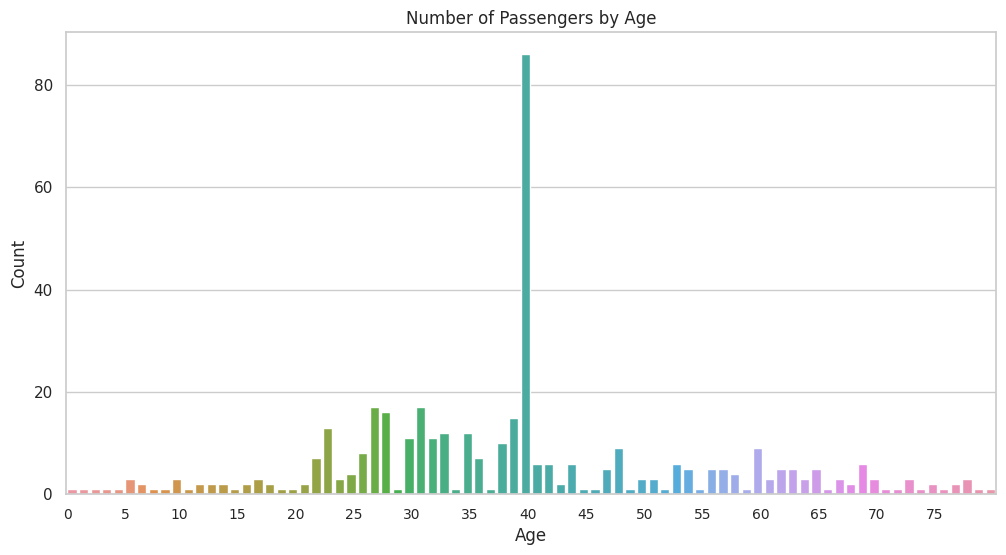

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', data=titanic_data)
plt.title("Number of Passengers by Age")
plt.xlabel("Age")
plt.ylabel("Count")

# Adjust x-axis labels font size and rotation
ax.set_xticks(ax.get_xticks()[::5])  # Display every 5th tick
ax.set_xticklabels(ax.get_xticks(), fontsize=10, ha="right")

plt.show()

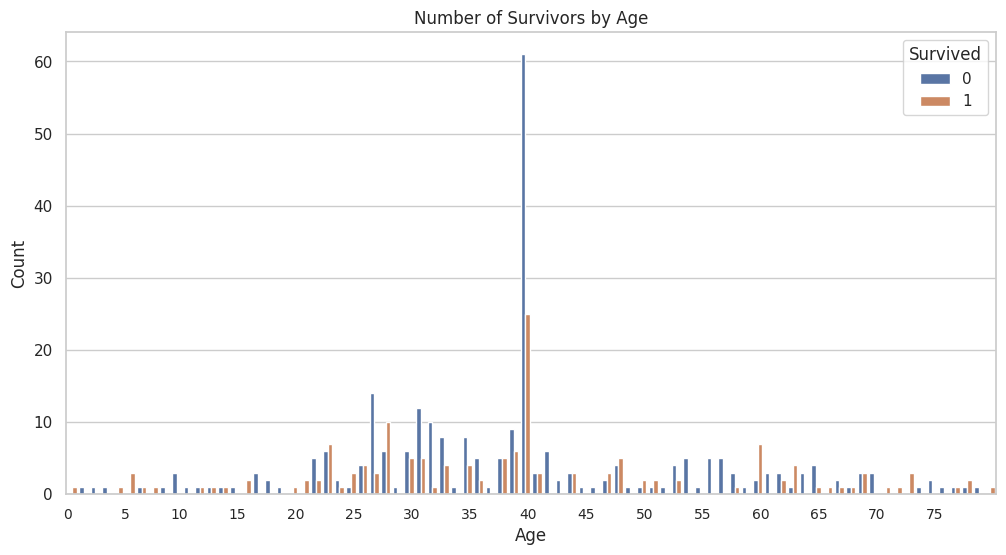

In [ ]:
# no of survivors Age wise
# Set the style of the plot
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', hue='Survived', data=titanic_data)
plt.title("Number of Survivors by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")

# Adjust x-axis labels font size and rotation
ax.set_xticks(ax.get_xticks()[::5])  # Display every 5th tick
ax.set_xticklabels(ax.get_xticks(), fontsize=10, ha="right")

plt.show()

Heat Map

In [ ]:
correlation_matrix = titanic_data.corr()

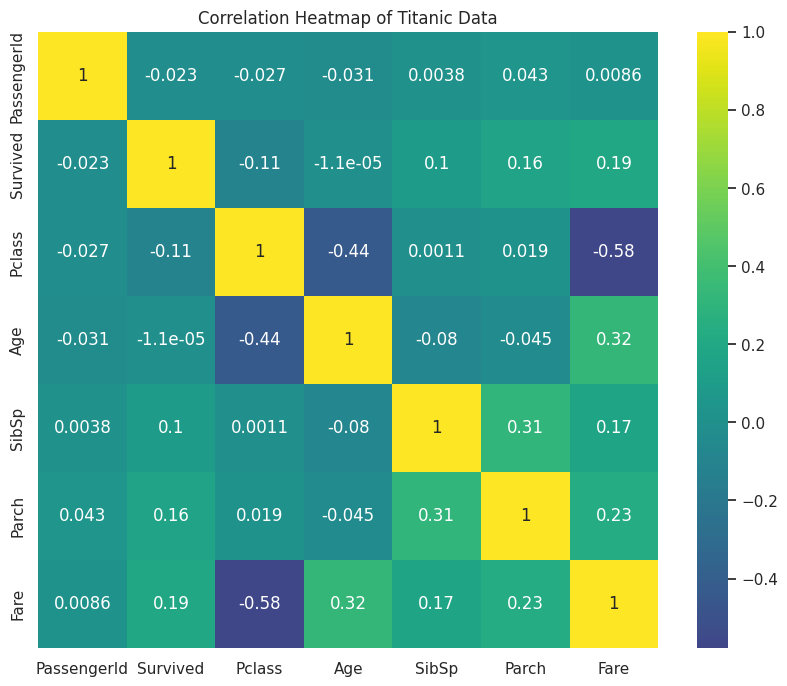

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title("Correlation Heatmap of Titanic Data")
plt.show()

***Encoding the categorical column***

In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


**Separating features and target**

In [ ]:
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y =titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


**Splitting the data into training data and Test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


**Model Training**

**Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
# training the logistic regression model with training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(max_iter=50)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=50)

**Model Evaluation**

**Accuracy Score**

In [ ]:
# Accuracy on training data
# X_train_prediction = model.predict(X_train)
X_train_array = X_train.to_numpy()
X_train_prediction = model.predict(X_train_array)

In [ ]:
print(X_train_prediction)

[0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0
 0]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7934131736526946


In [ ]:
# Accuracy on test data
X_test_array = X_test.to_numpy()
X_test_prediction = model.predict(X_test_array)

In [ ]:
print(X_test_prediction)

[0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 1 1 1 0 0 1 0 1]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data :', test_data_accuracy)

Accuracy score of test data : 0.8214285714285714
